---
title: "Suffix Array"
execute: 
  enabled: false
  freeze: true
date: "11/6/2024"
categories: [bioinformatics, data structure]
---


In [16]:
db = "GCATCGC"

# Suffix Array

One motivation behind suffix array is that any position in our database that is a match to any substring of our query sequence can be thought of as the beginning of a suffix.

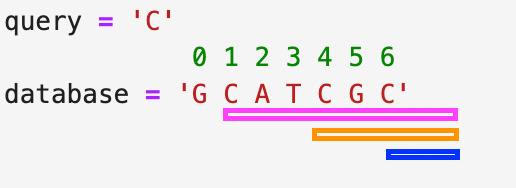

To illustrate:<br>
If we wanted to query the sequence `C` in database of `GCATCGC` then there would be 3 matching suffixes.<br>
1. One suffix starts from the first `C` character at index 1.<br>
2. The second suffix starts from the second `C` character at index 4.<br>
3. The third suffix starts from the third `C` character at index 6.<br>

To be able to do this, we first need to create an array of suffixes starting at each character of our database, then sort the array of suffixes alphabetically.

In [36]:
suffixes = {i:db[i:] for i,c in enumerate(db)}
print('Suffixes:\t\t', suffixes)

Suffixes:		 {0: 'GCATCGC', 1: 'CATCGC', 2: 'ATCGC', 3: 'TCGC', 4: 'CGC', 5: 'GC', 6: 'C'}


In [34]:
sorted_suffixes = {k: v for k, v in sorted(suffixes.items(), key=lambda item: item[1])}
sorted_suffix_keys = list(sorted_suffixes.keys())
print('Sorted Suffixes:\t', sorted_suffixes)
print('Sorted Suffix Keys:\t', sorted_suffix_keys)

Sorted Suffixes:	 {2: 'ATCGC', 6: 'C', 1: 'CATCGC', 4: 'CGC', 5: 'GC', 0: 'GCATCGC', 3: 'TCGC'}
Sorted Suffix Keys:	 [2, 6, 1, 4, 5, 0, 3]


# Suffix Array Search

We can do pattern matching on suffix array using binary search. Below we tried to search for suffixes matching the query `GC`.

In [124]:
query = 'GC'
low = 0
high = len(suffixes) - 1
found = False

while high > low and not found:
    mid = (low + high) // 2
    
    mid_key = sorted_suffix_keys[mid]
    low_key = sorted_suffix_keys[low]
    high_key = sorted_suffix_keys[high]

    if query == suffixes[mid_key][:len(query)]:
        found = True
        while query not in suffixes[low_key][:len(query)] and suffixes[low_key][:len(query)] < query and low < mid:
            low += 1
        while query not in suffixes[high_key][:len(query)] and suffixes[high_key][:len(query)] > query and high > mid:
            high -= 1
        
    elif suffixes[mid_key][:len(query)] > query:
        high = mid - 1
        if high < 0:
            print('out of bound, not found')
    elif suffixes[mid_key][:len(query)] < query:
        low = mid + 1
        if low >= len(suffixes):
            print('out of bound, not found')

print('-'*100)
print('Query:\n', query)
print('Original database:\n', db)
print('Sorted suffix array:\n', sorted_suffixes, '\n')
if found:
    low_key = sorted_suffix_keys[low]
    high_key = sorted_suffix_keys[high]
    print(f'Query "{query}" has a match at positions in the sorted suffix array:\t[{low_key}: {high_key}]')
else:
    print(f'No match found for query {query}.')
print('-'*100)

----------------------------------------------------------------------------------------------------
Query:
 GC
Original database:
 GCATCGC
Sorted suffix array:
 {2: 'ATCGC', 6: 'C', 1: 'CATCGC', 4: 'CGC', 5: 'GC', 0: 'GCATCGC', 3: 'TCGC'} 

Query "GC" has a match at positions in the sorted suffix array:	[5: 0]
----------------------------------------------------------------------------------------------------


Let's make this as a function and do searching on some more queries.

In [213]:
def get_suffixes(db:str) -> tuple:
    """Create suffix array and sort it in alphabetical order by the suffix sequences"""
    suffixes = {i:db[i:] for i,c in enumerate(db)}
    sorted_suffixes = {k: v for k, v in sorted(suffixes.items(), key=lambda item: item[1])}
    return suffixes, sorted_suffixes

def query_suffix_array(query:str, db:str, verbose:bool=False) -> list:
    """Search for query in the preprocessed suffix array using binary search.
    Returns a list of matched suffix sequences.
    """

    suffixes, sorted_suffixes = get_suffixes(db)
    sorted_suffix_keys = list(sorted_suffixes.keys())
    
    low = 0
    high = len(suffixes) - 1
    found = False
    
    while high > low and not found:
        mid = (low + high) // 2
        
        mid_key = sorted_suffix_keys[mid]
        low_key = sorted_suffix_keys[low]
        high_key = sorted_suffix_keys[high]
        if verbose: print('low key', low_key, 'mid key', mid_key, 'high key', high_key)
    
        if query == suffixes[mid_key] or query in suffixes[mid_key][:len(query)]:
            found = True
            while query not in suffixes[low_key][:len(query)] and suffixes[low_key] < query and low < mid:
                low += 1
                low_key = sorted_suffix_keys[low]
                
                if verbose: print('found bound, new low', sorted_suffix_keys[low])
                if query == suffixes[low_key][:len(query)]:
                    break
            while query not in suffixes[high_key][:len(query)] and suffixes[high_key] > query and high > mid:
                high -= 1
                high_key = sorted_suffix_keys[high]
                
                if verbose: print('found bound, new high1', sorted_suffix_keys[high])
                if query == suffixes[high_key][:len(query)]:
                    break

            while query in suffixes[sorted_suffix_keys[high+1]][:len(query)]:
                high += 1
                if verbose: print('found bound, new high2', sorted_suffix_keys[high])
            
        elif suffixes[mid_key] > query:
            high = mid
            if verbose: print('move high=mid')
            if high < 0:
                print('out of bound, not found')
        elif suffixes[mid_key] < query:
            low = mid
            if verbose: print('move low=mid')
            if low >= len(suffixes):
                print('out of bound, not found')

    print('-'*100)
    print('Query:\n', query)
    print('Original database:\n', db)
    print('Sorted suffix array:\n', sorted_suffixes, '\n')
    
    if found:
        low_key = sorted_suffix_keys[low]
        high_key = sorted_suffix_keys[high]
        result = [low_key, high_key]

        start_result_index = sorted_suffix_keys.index(result[0])
        end_result_index = sorted_suffix_keys.index(result[1])
        result_keys = sorted_suffix_keys[start_result_index : end_result_index+1]
        matched_result = [sorted_suffixes[k] for k in sorted_suffixes if k in result_keys]
        
        print('-'*100)
        print(f'Query "{query}" has a match at positions in the sorted suffix array:\t[{low_key}: {high_key}]')
        print('Matched suffixes:\t', matched_result)
        print('-'*100)
        return matched_result
        
    
    print('-'*100)
    print(f'No match found for query {query}.')
    print('-'*100)
    return []
    
    

In [214]:
query = "ACC"
query_suffix_array(query, db)

----------------------------------------------------------------------------------------------------
Query:
 ACC
Original database:
 GCATCGC
Sorted suffix array:
 {2: 'ATCGC', 6: 'C', 1: 'CATCGC', 4: 'CGC', 5: 'GC', 0: 'GCATCGC', 3: 'TCGC'} 

----------------------------------------------------------------------------------------------------
No match found for query ACC.
----------------------------------------------------------------------------------------------------


[]

In [217]:
query = "C"
query_suffix_array(query, db)

----------------------------------------------------------------------------------------------------
Query:
 C
Original database:
 GCATCGC
Sorted suffix array:
 {2: 'ATCGC', 6: 'C', 1: 'CATCGC', 4: 'CGC', 5: 'GC', 0: 'GCATCGC', 3: 'TCGC'} 

----------------------------------------------------------------------------------------------------
Query "C" has a match at positions in the sorted suffix array:	[6: 4]
Matched suffixes:	 ['C', 'CATCGC', 'CGC']
----------------------------------------------------------------------------------------------------


['C', 'CATCGC', 'CGC']

In [218]:
query = "AT"
query_suffix_array(query, db)

----------------------------------------------------------------------------------------------------
Query:
 AT
Original database:
 GCATCGC
Sorted suffix array:
 {2: 'ATCGC', 6: 'C', 1: 'CATCGC', 4: 'CGC', 5: 'GC', 0: 'GCATCGC', 3: 'TCGC'} 

----------------------------------------------------------------------------------------------------
Query "AT" has a match at positions in the sorted suffix array:	[2: 2]
Matched suffixes:	 ['ATCGC']
----------------------------------------------------------------------------------------------------


['ATCGC']

References & Credits:<br>
1. <a href="https://www.youtube.com/watch?v=IzMxbboPcqQ&list=PLM_KIlU0WoXmkV4QB1Dg8PtJaHTdWHwRS&index=72&pp=iAQB">Advance Data Structures: Suffix Arrays</a><br>
1. <a href="https://www.youtube.com/watch?v=VKe6b9QxDa8&list=PLM_KIlU0WoXmkV4QB1Dg8PtJaHTdWHwRS&index=73&pp=iAQB">Advance Data Structures: Suffix Array Search</a><br>